# Isometric embedding of the extremal Kerr throat

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

In [1]:
version()

'SageMath version 9.4.beta1, Release Date: 2021-06-06'

In [2]:
%display latex

In [3]:
r = var('r')
mu = var('mu', latex_name=r'\mu')
rho(r, mu) = sqrt(1 - mu^2)*sqrt(r^2 + 1 + 2*r*(1 - mu^2)/(r^2 + mu^2))
rho

(r, mu) |--> sqrt(-mu^2 + 1)*sqrt(r^2 - 2*(mu^2 - 1)*r/(mu^2 + r^2) + 1)

In [4]:
diff(rho(r, mu), r).simplify_full()

(sqrt(-mu^2 + 1)*mu^4*r + 2*sqrt(-mu^2 + 1)*mu^2*r^3 + sqrt(-mu^2 + 1)*r^5 + (mu^2 - 1)*sqrt(-mu^2 + 1)*r^2 - (mu^4 - mu^2)*sqrt(-mu^2 + 1))/((mu^4 + 2*mu^2*r^2 + r^4)*sqrt((r^4 + (mu^2 + 1)*r^2 + mu^2 - 2*(mu^2 - 1)*r)/(mu^2 + r^2)))

In [5]:
zp(r, mu) = sqrt( (r^2 + mu^2)/(r - 1)^2 - (diff(rho(r), r))^2 ).simplify_full()
zp(r, mu)

sqrt((mu^2*r^12 - 2*(mu^2 - 1)*r^11 + 2*(2*mu^4 + mu^2)*r^10 + 2*mu^10 - 2*(3*mu^4 - mu^2 - 2)*r^9 + (6*mu^6 + 4*mu^4 + 9*mu^2 - 4)*r^8 - 3*mu^8 - 2*(5*mu^6 - mu^4 - 3*mu^2 - 1)*r^7 + (4*mu^8 + 9*mu^6 + 9*mu^4 - mu^2 - 1)*r^6 + 3*mu^6 - 2*(5*mu^8 - 6*mu^4 + 2*mu^2 - 1)*r^5 + (mu^10 + 10*mu^8 + 5*mu^6 - 5*mu^4 + 5*mu^2 - 1)*r^4 - mu^4 - 2*(2*mu^10 + mu^6 - 5*mu^4 + 2*mu^2)*r^3 + (7*mu^10 - 9*mu^8 + 13*mu^6 - 7*mu^4 + 2*mu^2)*r^2 - 2*(3*mu^10 - 6*mu^8 + 4*mu^6 - mu^4)*r)/(r^12 - 10*mu^2*r^9 + 2*(2*mu^2 + 1)*r^10 - 2*r^11 + 6*mu^8*r^2 + 3*(2*mu^4 + 4*mu^2 - 1)*r^8 + mu^8 - 2*(9*mu^4 + 2*mu^2 - 1)*r^7 + 4*(mu^6 + 6*mu^4 - 2*mu^2)*r^6 - 2*(7*mu^6 + 6*mu^4 - 3*mu^2)*r^5 + (mu^8 + 20*mu^6 - 6*mu^4)*r^4 - 2*(2*mu^8 + 6*mu^6 - 3*mu^4)*r^3 - 2*(2*mu^8 - mu^6)*r))

In [6]:
zp2 = (2*r^7 + 4*r^5 - 4*r^4 + 2*r^3 - r^2 + 2*r - 1)/(r^3*(r^3 + r + 2)*(r - 1)^2)
zp2

(2*r^7 + 4*r^5 - 4*r^4 + 2*r^3 - r^2 + 2*r - 1)/((r^3 + r + 2)*(r - 1)^2*r^3)

In [7]:
bool(zp(r, 0)^2 == zp2)

True

In [8]:
s = (zp(r, mu)^2).numerator()
s.collect(r)

mu^2*r^12 - 2*(mu^2 - 1)*r^11 + 2*(2*mu^4 + mu^2)*r^10 + 2*mu^10 - 2*(3*mu^4 - mu^2 - 2)*r^9 + (6*mu^6 + 4*mu^4 + 9*mu^2 - 4)*r^8 - 3*mu^8 - 2*(5*mu^6 - mu^4 - 3*mu^2 - 1)*r^7 + (4*mu^8 + 9*mu^6 + 9*mu^4 - mu^2 - 1)*r^6 + 3*mu^6 - 2*(5*mu^8 - 6*mu^4 + 2*mu^2 - 1)*r^5 + (mu^10 + 10*mu^8 + 5*mu^6 - 5*mu^4 + 5*mu^2 - 1)*r^4 - mu^4 - 2*(2*mu^10 + mu^6 - 5*mu^4 + 2*mu^2)*r^3 + (7*mu^10 - 9*mu^8 + 13*mu^6 - 7*mu^4 + 2*mu^2)*r^2 - 2*(3*mu^10 - 6*mu^8 + 4*mu^6 - mu^4)*r

In [9]:
s = (zp(r, mu)^2).denominator()
s.factor()

(mu^2*r^2 + r^4 - 2*mu^2*r + mu^2 + r^2 + 2*r)*(mu^2 + r^2)^3*(r - 1)^2

Specific choice of $\mu := \cos\theta$:

In [10]:
#mu0 = sqrt(3)/2
mu0 = 0

In [11]:
zpf = fast_callable(zp(r, mu0), vars=[r])

def zz(r0, r1, verbose=False):
    numint = numerical_integral(zpf, r0, r1, algorithm='qags')
    error = numint[1]
    if verbose:
        print("Error = {}".format(error))
    if error > 1e-3: 
        print("Warning: error = {}".format(error))
    return numint[0]   

In [12]:
zz(2, 3, verbose=True)

Error = 1.6403995233359683e-14


1.4775405364069212

In [13]:
zz(1.5, 3, verbose=True)

Error = 5.314212959789082e-11


2.6279854005699983

In [14]:
zz(1.001, 3, verbose=True)

Error = 2.628708897735641e-09


9.33512707880594

In [15]:
zz(1.00001, 3, verbose=True)

Error = 8.104079286898108e-07


13.941287346979056

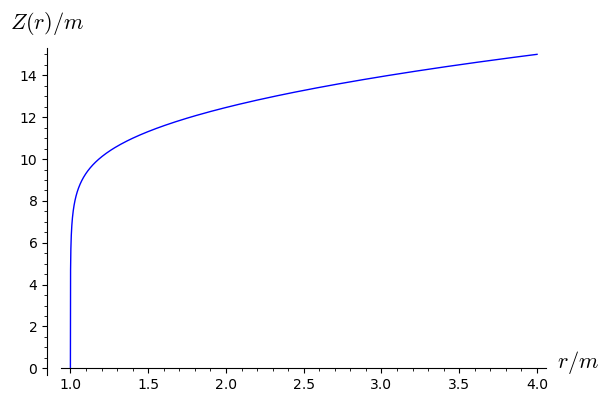

In [16]:
rmin = 1.00001
plot(lambda r: zz(rmin, r), (r, rmin, 4), 
     axes_labels = [r'$r/m$', r'$Z(r)/m$'])

In [17]:
rhof = fast_callable(rho(r, mu0), vars=[r])

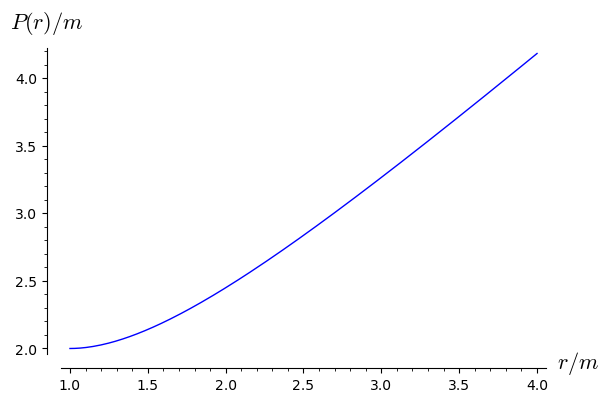

In [18]:
plot(rhof, (1, 4),
     axes_labels = [r'$r/m$', r'$P(r)/m$'])

In [19]:
rmin = 1.00001

def xe(r, ph):
    return rhof(r)*cos(ph)

def ye(r, ph):
    return rhof(r)*sin(ph)

def ze(r, ph):
    return zz(rmin, r)

In [20]:
rmax = 10
graph = parametric_plot3d([xe, ye, ze], (rmin, rmax), (0, 2*pi), 
                          color='lightsteelblue')
graph

Graphics3d Object

Constant $r$ curve:

In [21]:
def const_r(r0, color='blue', thickness=5):
    return parametric_plot3d([lambda ph: xe(r0, ph), lambda ph: ye(r0, ph), 
                              lambda ph: ze(r0, ph)], (0, 2*pi), 
                              color=color, thickness=thickness)

Adding the ergosurface, i.e. the curve $r=m(1 + \sin\theta)$:

In [22]:
graph += const_r(1 + sqrt(1 - mu0^2), thickness=7)

Adding the curves $r/m = 1 + 10^{-5},\ldots, 1 + 10^{-1}$:

In [23]:
for i in range(1, 6):
    graph += const_r(1 + 10^(-i), color='black')

In [24]:
show(graph, axes_labels_style=dict(fontsize=12, fontfamily='Liberation Sans'))

Graphics3d Object